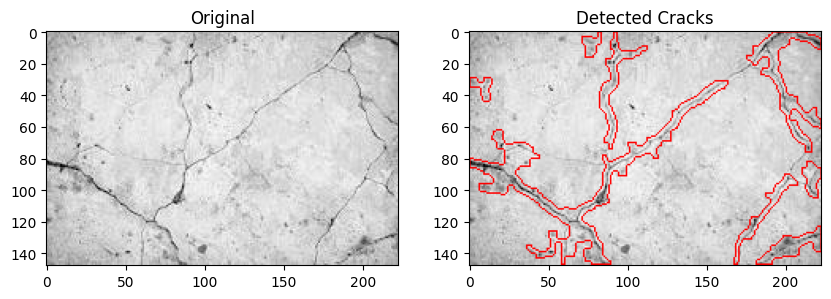

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\Civil_EL\download (1).jfif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)

closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:  
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h + 1)
        if aspect_ratio < 4:  
            cv2.drawContours(output, [cnt], -1, (0, 0, 255), 1)  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Detected Cracks')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()
